# Netflix Dataset – EDA + Feature Engineering
**Goal:**  
- Perform Exploratory Data Analysis (EDA)  
- Create new useful features (Feature Engineering)  
- Extract insights with multiple visualizations  

**Steps:**  
1. Load & clean the dataset  
2. Explore patterns & trends  
3. Create new columns (feature engineering)  
4. Visualize data with multiple graphs  
5. Save the cleaned dataset  

**Libraries Used:** Pandas, Matplotlib, Seaborn


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Netflix dataset
df = pd.read_csv("netflix_titles.csv")

# Show basic info
print("Dataset shape:", df.shape)  # rows & columns
print("Columns:", df.columns.tolist())  # column names
df.head()


Dataset shape: (8807, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Check detailed info
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Why are we doing this?
- To **understand the structure** of the dataset (datatypes, non-null values).  
- To **identify missing values** so we can clean them.  


In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Fill missing country & date_added with 'Unknown' (Safe way)
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')



### Why are we doing this?
- **Duplicates**: Repeated rows don't add value, so we remove them.  
- **Missing values**: Instead of leaving blanks, we fill with 'Unknown'.  


In [9]:
# 1. Add a new column 'is_movie' (1 if Movie, 0 if TV Show)
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# 2. Add 'release_decade' column (group by decade)
df['release_decade'] = (df['release_year'] // 10) * 10

# 3. Add 'content_length' (Short/Long) based on duration
df['content_length'] = df['duration'].apply(
    lambda x: 'Long' if 'min' in str(x) and int(str(x).split()[0]) > 90 else 'Short'
)

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_movie,release_decade,content_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,2020,Short
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,2020,Short
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,2020,Short
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,2020,Short
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,2020,Short


### Why are we doing this?
- `is_movie`: Quickly separate Movies vs TV Shows.  
- `release_decade`: See trends across decades (1990s, 2000s, etc.).  
- `content_length`: Classify movies as **Short** or **Long** based on duration (>90 mins).  


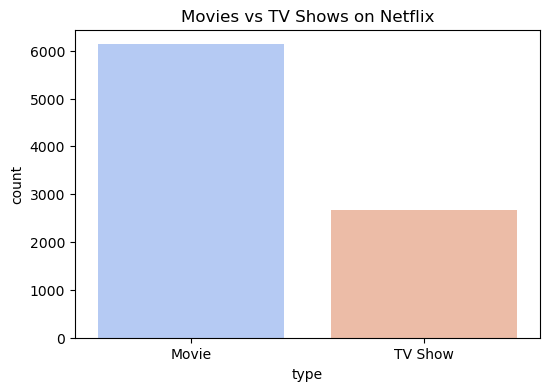

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='type', palette='coolwarm', legend=False)
plt.title('Movies vs TV Shows on Netflix')
plt.show()


**Insight:**  
- This shows how many **Movies** vs **TV Shows** exist on Netflix.  


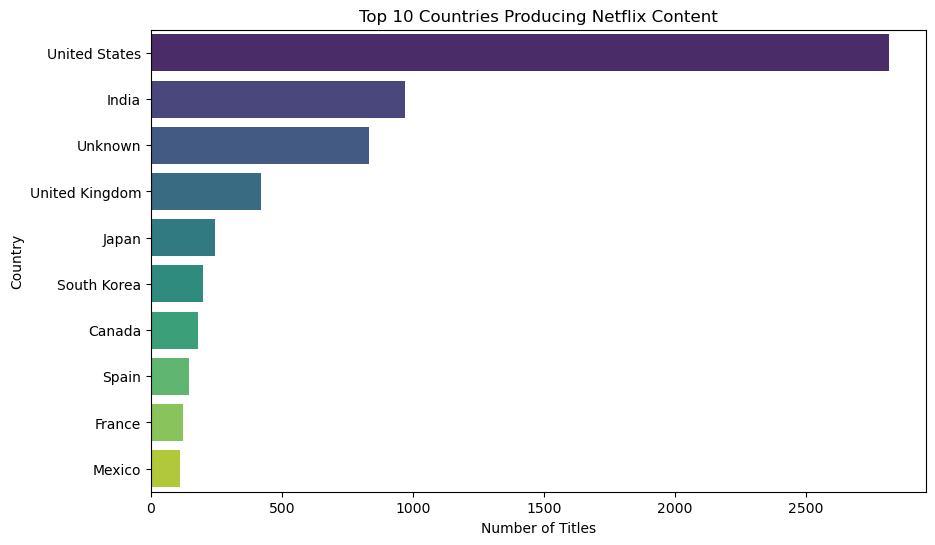

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,
    palette='viridis',
    legend=False
)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()



**Insight:**  
- **USA & India** dominate in producing Netflix content.  


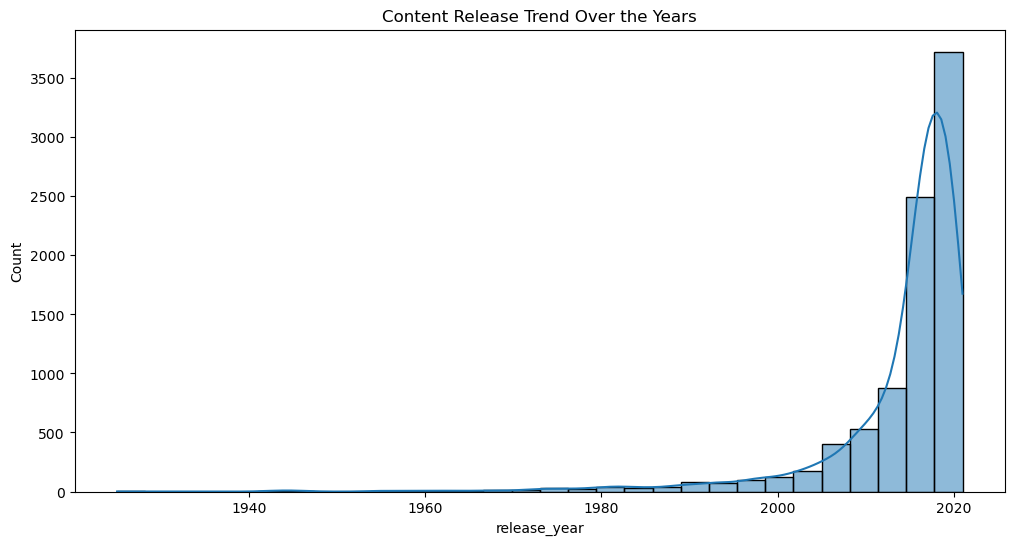

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='release_year', bins=30, kde=True)
plt.title('Content Release Trend Over the Years')
plt.show()


**Insight:**  
- Netflix content production **increased rapidly after 2015**.  


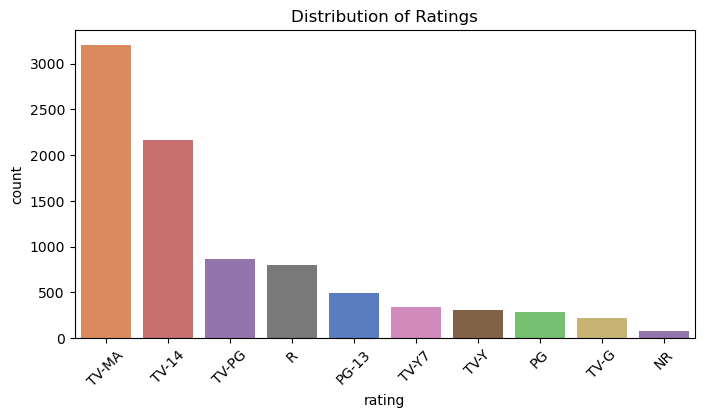

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='rating',
    hue='rating',
    order=df['rating'].value_counts().index[:10],
    palette='muted',
    legend=False
)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
- Ratings like **TV-MA, TV-14, TV-PG** are the most common on Netflix.  


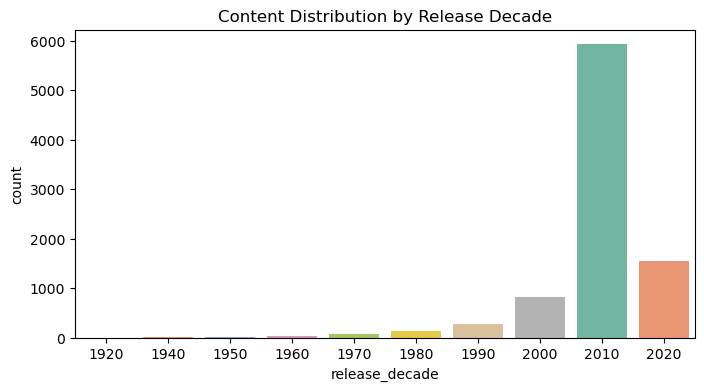

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='release_decade',
    hue='release_decade',
    palette='Set2',
    legend=False
)
plt.title('Content Distribution by Release Decade')
plt.show()


**Insight:**  
- Most Netflix content is from the **2010s decade**.  


In [29]:
df.to_csv("netflix_cleaned_day10.csv", index=False)
print("Cleaned dataset saved!")


Cleaned dataset saved!


**Why?**  
- We save the cleaned and enhanced dataset for use in future analysis (next days).  
